In [5]:
import seagul.envs
import ray
import ray.rllib.agents.ars as ars
from ray.tune.logger import pretty_print
import tensorflow as tf
import time
from tqdm import trange
from ray import tune

from ray.tune.registry import register_env
from seagul.envs.mujoco.five_link import FiveLinkWalkerEnv

#env_name = "Walker2d-v3"
env_name = "five_link-v3"
###
def env_creator(env_config):
    return FiveLinkWalkerEnv()  # return an env instance

register_env("five_link-v3", env_creator)
###

ray.init()
config = ars.DEFAULT_CONFIG.copy()
config["num_gpus"] = 0
config["num_workers"] = 8
config["eager"] = False
config["model"]["fcnet_hiddens"] = []

trainer = ars.ARSTrainer(config=config, env=env_name)
# Can optionally call trainer.restore(path) to load a checkpoint.
for i in trange(500):
   # Perform one iteration of training the policy with ARS
    result = trainer.train()


    
checkpoint = trainer.save()
print("checkpoint saved at", checkpoint)
print(pretty_print(result))
ray.shutdown()

2019-11-07 22:37:35,339	INFO resource_spec.py:205 -- Starting Ray with 3.47 GiB memory available for workers and up to 1.75 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2019-11-07 22:37:35,734	INFO trainer.py:344 -- Tip: set 'eager': true or the --eager flag to enable TensorFlow eager execution
2019-11-07 22:37:35,926	INFO ars.py:184 -- Creating shared noise table.
2019-11-07 22:37:44,864	INFO ars.py:189 -- Creating actors.
2019-11-07 22:37:45,006	WARNING actor.py:678 -- Actor is garbage collected in the wrong driver. Actor id = ActorID(1fbf266401000000), class name = Worker.
2019-11-07 22:37:45,050	WARNING actor.py:678 -- Actor is garbage collected in the wrong driver. Actor id = ActorID(404439ec01000000), class name = Worker.
2019-11-07 22:37:45,053	WARNING actor.py:678 -- Actor is garbage collected in the wrong driver. Actor id = ActorID(fd9b91ec01000000), class name = Worker.
2019-11-07 22:37:45,054	WARNING actor.py:678 

(pid=18731) /home/sgillen/miniconda3/envs/ray/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
(pid=18731)   _np_qint8 = np.dtype([("qint8", np.int8, 1)])
(pid=18731) /home/sgillen/miniconda3/envs/ray/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
(pid=18731)   _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
(pid=18731) /home/sgillen/miniconda3/envs/ray/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
(pid=18731)   _np_qint16 = np.dtype([("q

/home/sgillen/miniconda3/envs/ray/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/sgillen/miniconda3/envs/ray/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/sgillen/miniconda3/envs/ray/lib/python3.6/site-packages/ray/rllib/agents/ars/ars.py:289: RuntimeWarning: Mean of empty slice.
  episode_len_mean=eval_lengths.mean(),
  1%|          | 3/500 [00:04<17:20,  2.09s/it]/home/sgillen/miniconda3/envs/ray/lib/python3.6/site-packages/ray/rllib/agents/ars/ars.py:289: RuntimeWarning: Mean of empty slice.
  episode_len_mean=eval_lengths.mean(),
/home/sgillen/miniconda3/envs/ray/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
  1%|          | 5/500 [00:05<09:22,  1.14s/it]/home/sgillen/miniconda3/envs/ray/li

checkpoint saved at /home/sgillen/ray_results/ARS_five_link-v3_2019-11-07_22-37-35d91ohtux/checkpoint_500/checkpoint-500
date: 2019-11-07_22-53-33
done: false
episode_len_mean: .nan
episode_reward_mean: 1038.0361755371093
experiment_id: c8f60fd6e60b4a3c96155b53106be4f4
hostname: sgdt
info:
  episodes_so_far: 16000
  episodes_this_iter: 32
  grad_norm: 8.972094535827637
  update_ratio: 0.02978908270597458
  weights_norm: 1.0124694108963013
  weights_std: 0.1341237723827362
iterations_since_restore: 500
node_ip: 192.168.0.12
perf:
  cpu_util_percent: 48.800000000000004
  gpu_util_percent0: 0.023333333333333334
  ram_util_percent: 57.833333333333336
  vram_util_percent0: 0.08213991769547326
pid: 367
time_since_restore: 946.283136844635
time_this_iter_s: 2.3653409481048584
time_total_s: 946.283136844635
timestamp: 1573196013
timesteps_since_restore: 11098094
timesteps_this_iter: 31719
timesteps_total: 11098094
training_iteration: 500



In [ ]:
import numpy as np
trainer.policy.compute(np.random.randn(13))



In [ ]:
import seagul.envs
import ray
import ray.rllib.agents.ars as ars
from ray.tune.logger import pretty_print
import tensorflow as tf


from ray.tune.registry import register_env
from seagul.envs.mujoco.five_link import FiveLinkWalkerEnv

def env_creator(env_config):
    return FiveLinkWalkerEnv()  # return an env instance

register_env("five_link-v3", env_creator)

ray.init()
config = ars.DEFAULT_CONFIG.copy()
config["num_gpus"] = 0
config["num_workers"] = 1
config["eager"] = False
trainer = ars.ARSTrainer(config=config, env="five_link-v3")

trainer.load("/Users/sgillen/ray_results/ARS_five_link-v3_2019-10-21_14-02-55lwgccrp3/checkpoint_10/checkpoint-10") 
trainer.restore("/Users/sgillen/ray_results/ARS_five_link-v3_2019-10-21_14-02-55lwgccrp3/checkpoint_10/checkpoint-10")


Creating window glfw
1050.9474139016722


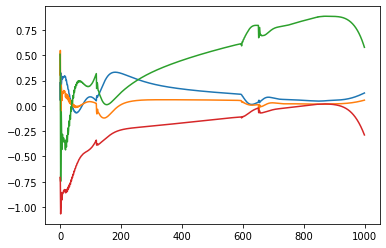

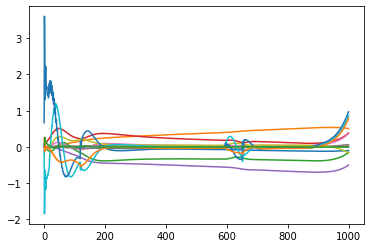

In [10]:
import gym
import numpy as np
import matplotlib.pyplot as plt

env = gym.make(env_name)
obs = env.reset()

action_hist = []
state_hist  = []
reward_hist = []

done = False
while not done:
    actions = trainer.compute_action(obs.flatten())
    obs, reward, done, _ = env.step(np.asarray(actions))
    env.render()
    action_hist.append(np.copy(actions))
    state_hist.append(np.copy(obs))
    reward_hist.append(np.copy(reward))
    if done:
        break


print(sum(reward_hist))
plt.plot(action_hist)
plt.figure()
plt.plot(state_hist)